# Data Science and Business Analytics Intern

## GRIP @ The Sparks Foundation
# Author : Manmohan Singh Bisht

## Task-2: To Explore Unsupervised Machine Learning


In this task we have to predict the optimum number of clusters and represent it visually from the given 'iris' dataset.


## Step 1 - Importing the required libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Step 2 - Reading the data from source

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop(['Id'],axis=1,inplace=True)

In [4]:
df.head() #diplay the fisrt 5 dataset.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 3 - Checking for missing value

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 4 - Checking for duplicate values & Dropping the duplicate values

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

## Step 5 - Check for any outliers in the numeric data

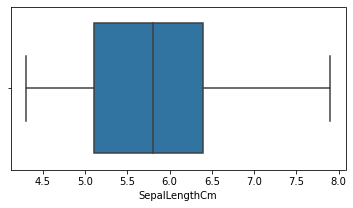

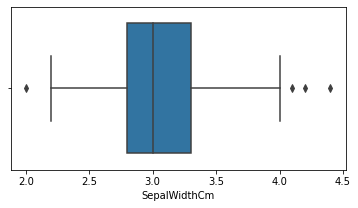

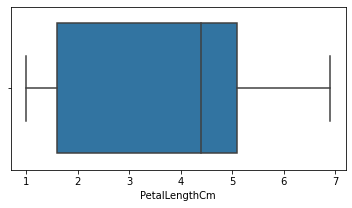

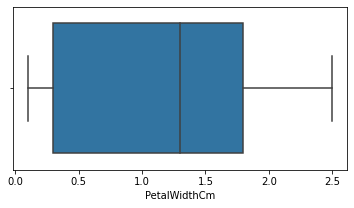

In [11]:
for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

## Step 6 - Treating outliers present in the SepalwidthCm column

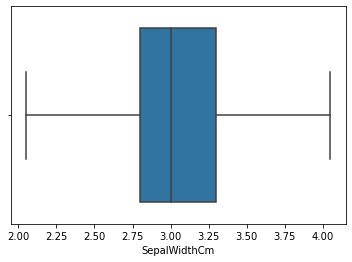

In [12]:
q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)
sns.boxplot(df['SepalWidthCm']);

## Step 7 - Understanding the data

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


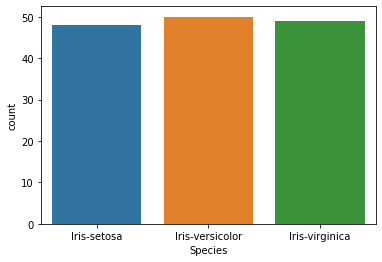

In [13]:
print(df.Species.value_counts())
sns.countplot(df.Species);

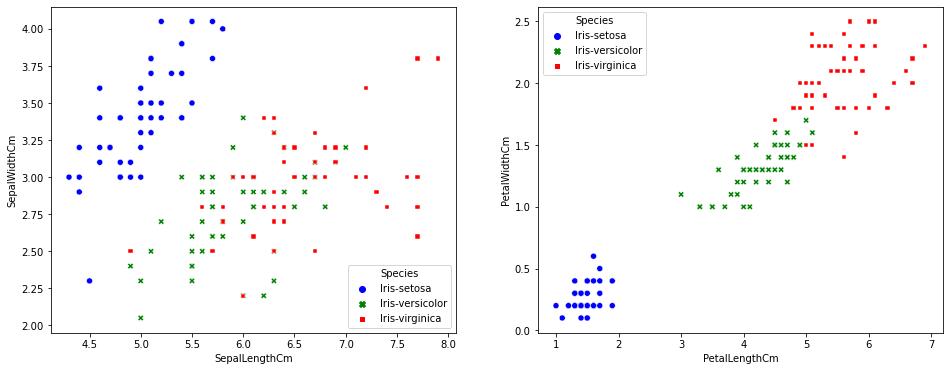

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x = df.SepalLengthCm, y =  df.SepalWidthCm,
                hue = df.Species, style = df.Species, palette=['blue', 'green', 'red']);

plt.subplot(1,2,2)
sns.scatterplot(x = df.PetalLengthCm, y =  df.PetalWidthCm,
                hue = df.Species, style = df.Species, palette=['blue', 'green', 'red']);

In [15]:
#Correlation Matrix

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

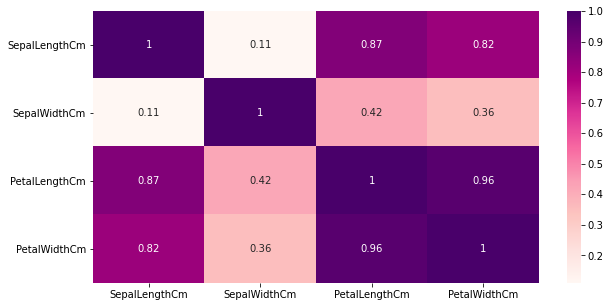

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()), cmap='RdPu', annot=True)

## Step 8 - To find the optimum number of clusters for K Means

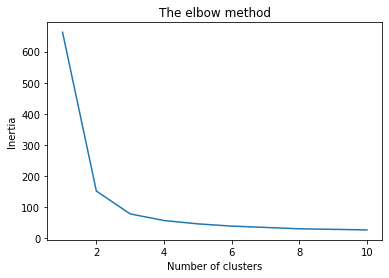

In [17]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
Inner = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    Inner.append(kmeans.inertia_)
    

plt.plot(range(1, 11), Inner)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
# Applying kmeans to the dataset and creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

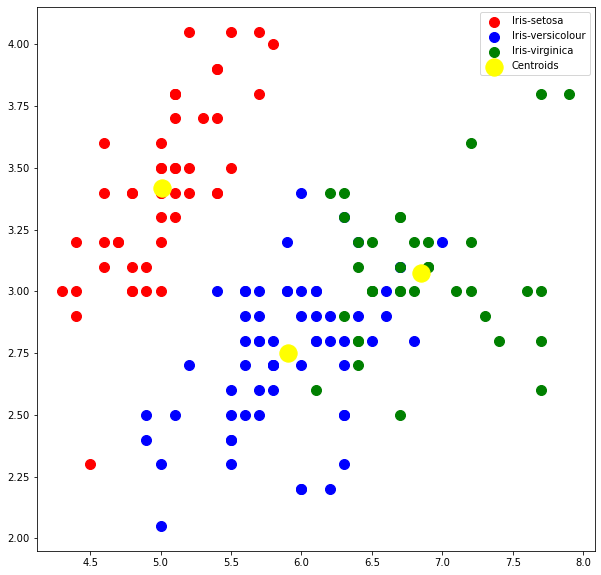

In [19]:
# Visualising the clusters on two columns
plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = 'yellow', label = 'Centroids')

plt.legend(loc = 'upper right')
plt.show()

## Conclusion
From the above visualization we see that one species can be easily clusterd which is not the case with the other two. 
Further K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3.
## Thank You